In [1]:
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers

Using TensorFlow backend.


In [2]:
RESOLUTION = 150
BATCH_SIZE = 128

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
        'the-simpsons-dataset/top-10/',
        target_size=(RESOLUTION, RESOLUTION),
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        'the-simpsons-dataset/top-10/',
        target_size=(RESOLUTION, RESOLUTION),
        class_mode='categorical', subset="validation")

Found 11745 images belonging to 10 classes.
Found 2066 images belonging to 10 classes.


In [3]:
train_generator.class_indices

{'bart_simpson': 0,
 'charles_montgomery_burns': 1,
 'homer_simpson': 2,
 'krusty_the_clown': 3,
 'lisa_simpson': 4,
 'marge_simpson': 5,
 'milhouse_van_houten': 6,
 'moe_szyslak': 7,
 'ned_flanders': 8,
 'principal_skinner': 9}

In [4]:
model = Sequential()
model.add(layers.Conv2D(filters=100, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Conv2D(filters=100, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Questão 2a.

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 504100)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32262464  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 32,520,814
Trainable params: 32,520,814
Non-trainable params: 0
________________________________________________________________

In [ ]:
epoch_ = [10, 50, 100]
lr_ = [0.001, 0.01, 0.1]
history_report = []

In [ ]:
N_TRAIN = 11745
N_VAL = 2066

for l_ in lr_:
    opt = optimizers.RMSprop(lr=l_, rho=0.9, epsilon=None, decay=0.0)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=epoch_[2],
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE) 
    )

    history_report.append(history)

# Questão 2b.

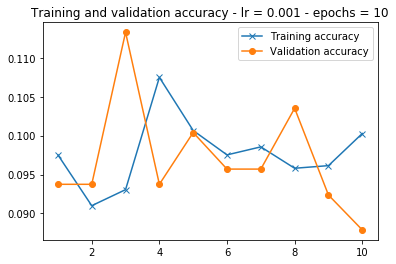

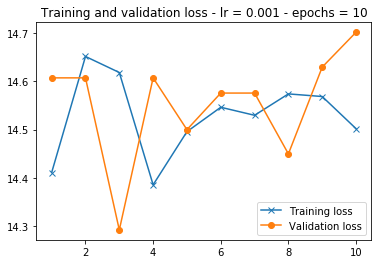

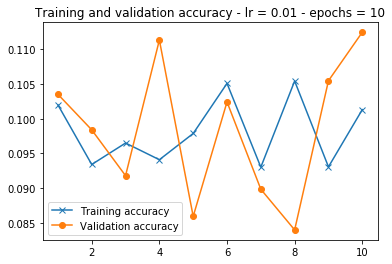

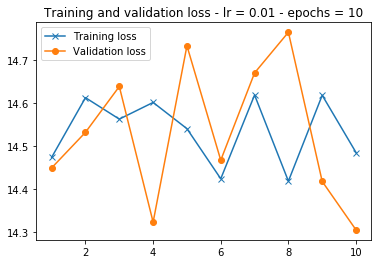

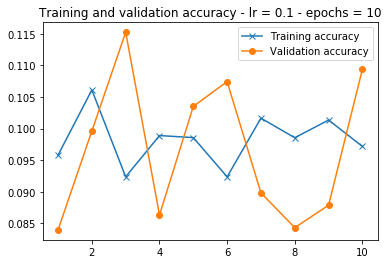

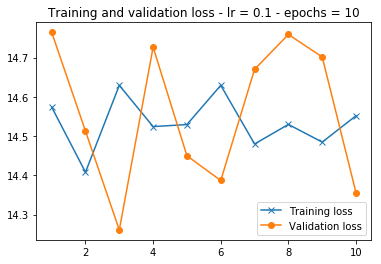

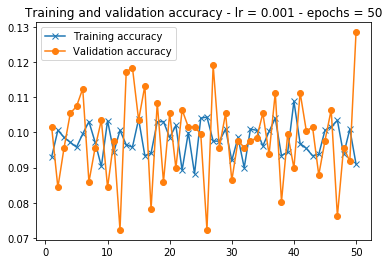

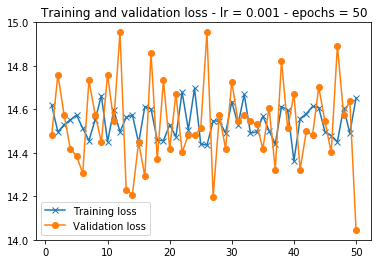

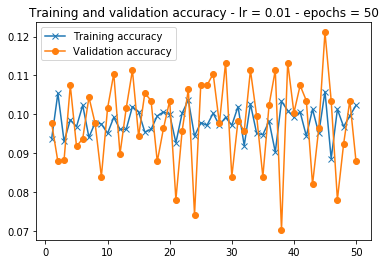

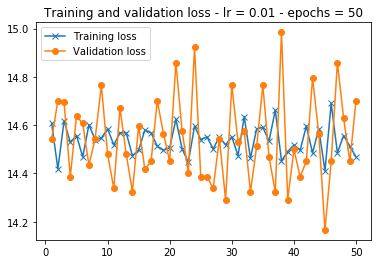

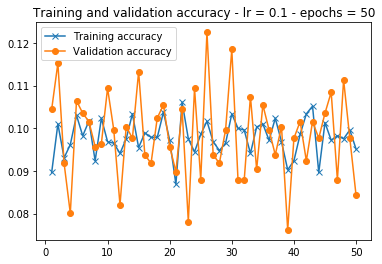

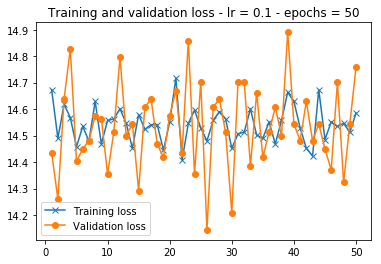

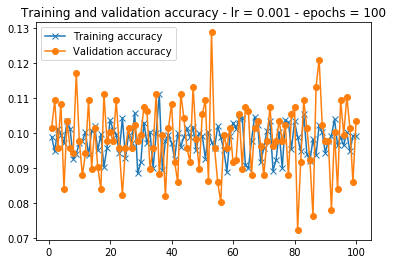

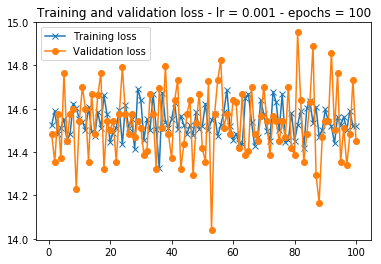

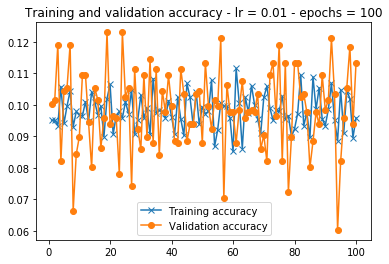

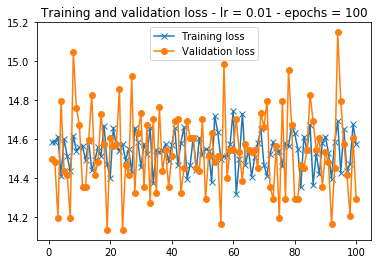

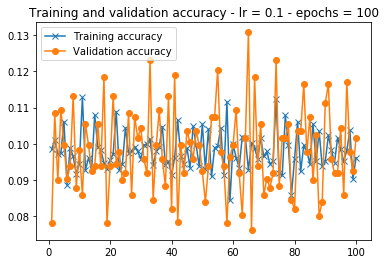

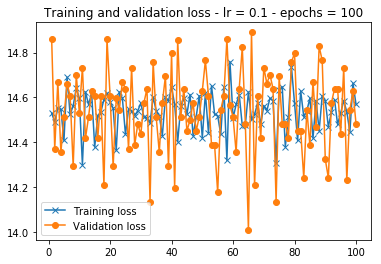

In [18]:
i = 0
for history in history_report:
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, label='Training accuracy', marker='x')
    plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
    plt.title('Training and validation accuracy - lr = {} - epochs = {}'.format(lr_[i % 3], len(acc)))
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, label='Training loss', marker='x')
    plt.plot(epochs, val_loss, label='Validation loss', marker='o')
    plt.title('Training and validation loss - lr = {} - epochs = {}'.format(lr_[i % 3], len(acc)))
    plt.legend()

    plt.show()
    i = i + 1